In [1]:
## MOBO on ZDT1 Unconstrained problem

In [2]:
# main function
import numpy as np
import torch
import matplotlib.pyplot as plt


from xopt.bayesian.algorithms import mobo
from botorch.utils.multi_objective.pareto import is_non_dominated

# test function
from xopt.evaluators import test_TNK
from xopt.evaluators import test_ZDT



In [4]:
# Get VOCS
VOCS = test_ZDT.VOCS

# add reference point
ref = torch.tensor((11., 11.))

print(VOCS)
# Get evaluate function
EVALUATE = test_ZDT.evaluate
VOCS['linked_variables'] = {}

# VOCS['variables']['x1'] = [0, 4]  # Extent to occasionally throw an exception

# Run
results = mobo(VOCS, EVALUATE, ref = ref, n_steps=20, verbose=False)
model = results['model']


{'name': 'ZDT1_test', 'description': 'ZDT1 unconstrained multi-objective test function', 'simulation': 'ZDT1_test', 'variables': {'x1': [0, 1.0], 'x2': [0, 1.0]}, 'objectives': {'y1': 'MINIMIZE', 'y2': 'MINIMIZE'}, 'constraints': {}, 'constants': {'a': 'dummy_constant'}, 'linked_variables': {'x9': 'x1'}}


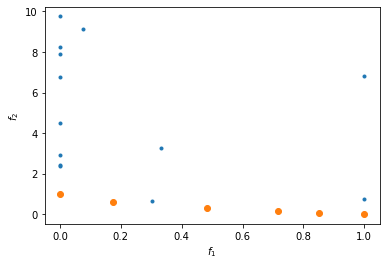

In [5]:
# plot the results
train_y = results['objectives']

fig, ax = plt.subplots()
ax.plot(train_y[:, 0], train_y[:, 1], '.')
ax.set_xlabel('$f_1$')
ax.set_ylabel('$f_2$')

# highlight Pareto front (note botorch assumes maximization when determing dominant points) - see http://people.ee.ethz.ch/~sop/download/supplementary/testproblems/zdt1/index.php for Pareto front comparison
non_dom = is_non_dominated(-train_y)
ax.plot(train_y[:,0][non_dom],train_y[:,1][non_dom],'C1o')